In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#import raw data 1
csv_path_1 = "Pyber/Raw data/city_data copy.csv"
city_data_df = pd.read_csv(csv_path_1)
city_data_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [100]:
#import raw data 2
csv_path_2 = "Pyber/Raw data/ride_data copy.csv"
ride_data_df = pd.read_csv(csv_path_2)
ride_data_df.head()




,city,date,fare,ride_id
0,Sarabury,2016/01/16 13:49:00,38.35,5400000000000
1,South Roy,2016/01/02 18:42:00,17.49,4040000000000
2,Wiseborough,2016/01/21 17:35:00,44.18,3650000000000
3,Spencertown,2016/07/31 14:53:00,6.87,2240000000000
4,Nguyenbury,2016/07/09 04:42:00,6.28,1540000000000


In [143]:
#merge two tables with city name
merge_table_df= pd.merge(city_data_df,ride_data_df, on="city")

merge_table_df.head()




,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016/08/19 04:27:00,5.51,6250000000000
1,Kelseyland,63,Urban,2016/04/17 06:59:00,5.54,7470000000000
2,Kelseyland,63,Urban,2016/05/04 15:06:00,30.54,2140000000000
3,Kelseyland,63,Urban,2016/01/25 20:44:00,12.08,1900000000000
4,Kelseyland,63,Urban,2016/08/09 18:19:00,17.91,8780000000000


### Bubble Plot of Ride Sharing Data

In [138]:
#Group by city
group_city=merge_table_df.groupby('city')

#count the total rides per city
total_ride=group_city.count()["ride_id"]

total_ride.head()
#total_ride=total_ride.to_frame()
#total_ride=total_ride.reset_index()


city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [103]:
# sum up the total fare per city and divided by total rides per city # Format after
city_fare_avg=(group_city_df.sum()["fare"]/group_city_df.count()["ride_id"]).map("{:.2f}".format).head()




city_fare_avg=city_fare_avg.to_frame()
city_fare_avg=city_fare_avg.reset_index()
city_fare_avg.head()


,city,0
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


### Total Fares by City Type

In [104]:
#Group by city type and then sum up the fares by each city type
city_type=merge_table_df.groupby('type')

total_fare_type=city_type["fare"].sum()

total_fare_type



type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

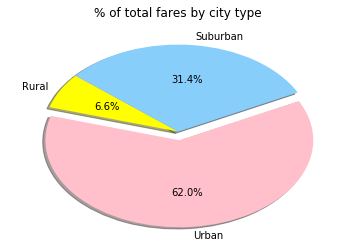

In [139]:
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [4255.09, 40078.34, 20335.69]

# The colors of each section of the pie chart
colors = ["yellow", "pink", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

plt.pie(sizes,labels=labels, colors=colors,explode=explode ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of total fares by city type')
plt.show()

### Total Rides by City Type

In [105]:
#Group by city type and then count the total ride by each city type
city_type=merge_table_df.groupby("type")

total_ride_type=city_type["ride_id"].count()

total_ride_type



type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

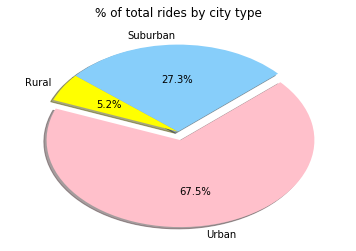

In [142]:
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [125, 1625, 657]

# The colors of each section of the pie chart
colors = ["yellow", "pink", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

plt.pie(sizes,labels=labels, colors=colors,explode=explode ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of total rides by city type')
plt.show()

### Total Drivers by City Type

In [123]:
#Group by city type and then sum up the total drivers by each city type
city_type=merge_table_df.groupby("type")

driver_city_type = city_type["driver_count"].sum()

driver_city_type


 

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

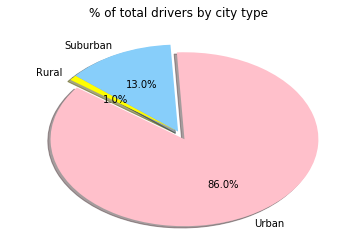

In [140]:
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [727, 64501, 9730]

# The colors of each section of the pie chart
colors = ["yellow", "pink", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

plt.pie(sizes,labels=labels, colors=colors,explode=explode ,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('% of total drivers by city type')
plt.show()